In [337]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [338]:
pd.set_option('display.max_columns',None)

In [339]:
df = pd.read_csv("gurgaon_properties_outliers_treated.csv")

In [340]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,1,8,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,1,38,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,1,49,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,2,174,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,1,159,266.000000


In [341]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1016
agePossession             0
super_built_up_area    1692
built_up_area          1970
carpet_area            1718
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# builtup area

<Axes: xlabel='super_built_up_area', ylabel='built_up_area'>

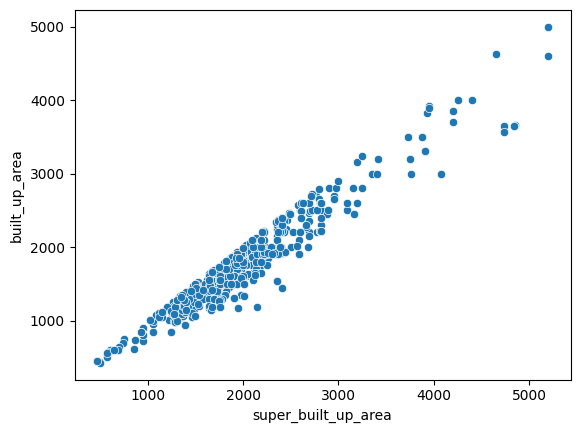

In [342]:
sns.scatterplot(x = df['super_built_up_area'], y = df['built_up_area'])

<Axes: xlabel='carpet_area', ylabel='built_up_area'>

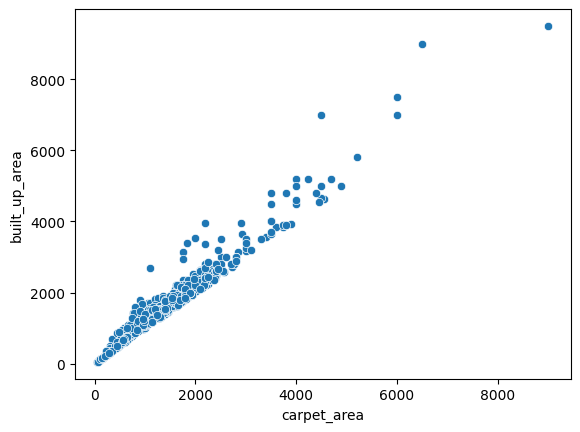

In [343]:
sns.scatterplot(x = df['carpet_area'], y = df['built_up_area'])

In [344]:
df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [345]:
all_present = df[~(df['super_built_up_area'].isnull()) & ~(df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [346]:
ratio_super_built = (all_present['super_built_up_area']/all_present['built_up_area']).median()
ratio_carpet_built = (all_present['carpet_area']/all_present['built_up_area']).median()

In [347]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [348]:
sbc_df['built_up_area'].fillna(round((sbc_df['super_built_up_area']/ratio_super_built) + (sbc_df['carpet_area']/ratio_carpet_built),2), inplace = True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_29804\2836224595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round((sbc_df['super_built_up_area']/ratio_super_built) + (sbc_df['carpet_area']/ratio_carpet_built),2), inplace = True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_29804\2836224595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [349]:
df.update(sbc_df)

In [350]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1016
agePossession             0
super_built_up_area    1692
built_up_area          1549
carpet_area            1718
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [351]:
sbc_df2 = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [352]:
sbc_df2['built_up_area'].fillna(round((sbc_df2['super_built_up_area']/ratio_super_built),2), inplace = True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_29804\2560465336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df2['built_up_area'].fillna(round((sbc_df2['super_built_up_area']/ratio_super_built),2), inplace = True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_29804\2560465336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df2['b

In [353]:
df.update(sbc_df2)

In [354]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1016
agePossession             0
super_built_up_area    1692
built_up_area           677
carpet_area            1718
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [355]:
sbc_df3 = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [356]:
sbc_df3['built_up_area'].fillna(round((sbc_df3['carpet_area']/ratio_carpet_built),2), inplace = True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_29804\2958305079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df3['built_up_area'].fillna(round((sbc_df3['carpet_area']/ratio_carpet_built),2), inplace = True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_29804\2958305079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df3['built_up

In [357]:
df.update(sbc_df3)

In [358]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1016
agePossession             0
super_built_up_area    1692
built_up_area             0
carpet_area            1718
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

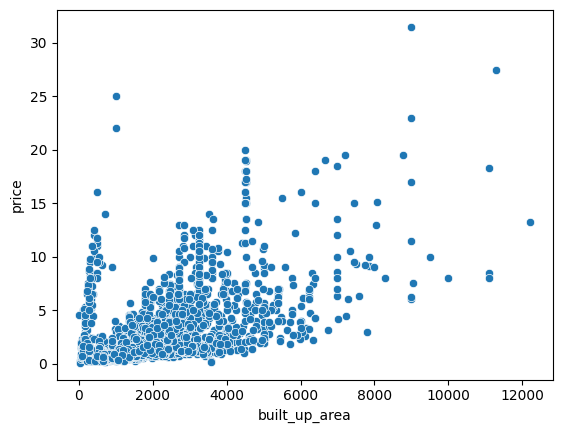

In [359]:
sns.scatterplot(x = df['built_up_area'], y = df['price'])

In [360]:
anamoly_df = df[(df['built_up_area']<2000) & (df['price']>2.5)][['area', 'price', 'built_up_area']]

In [361]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [362]:
anamoly_df

,area,price,built_up_area
9,1350.0,4.50,1350.0
35,2160.0,8.25,2160.0
41,1800.0,5.50,1800.0
42,2200.0,2.58,2200.0
58,2430.0,5.75,2430.0
68,1961.0,7.60,1961.0
71,1449.0,2.99,1449.0
73,1400.0,2.65,1400.0
88,1500.0,2.80,1500.0
96,2395.0,3.65,2395.0


In [363]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

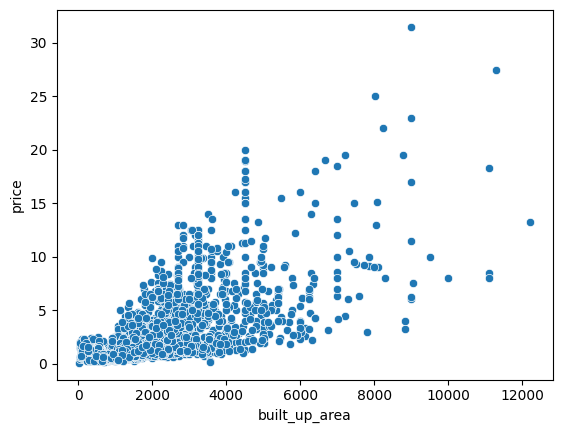

In [364]:
sns.scatterplot(x = df['built_up_area'], y = df['price'])

In [365]:
df.drop(columns=['facing', 'area', 'areaWithType','super_built_up_area','carpet_area'], inplace = True)

In [366]:
df.isnull().sum()

property_type       0
society             1
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum           16
agePossession       0
built_up_area       0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
area_room_ratio     0
dtype: int64

In [367]:
df[df['society'].isna()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2540,flat,NaN,sector 78,0.6,3692.0,2,2,0,NaN,Under Construction,1625.0,0,0,0,0,0,1,0,812.5


In [368]:
df.drop(index = 2540, inplace = True)

In [369]:
df.isnull().sum()

property_type       0
society             0
sector              0
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum           15
agePossession       0
built_up_area       0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
area_room_ratio     0
dtype: int64

In [370]:
df['floorNum'] = df['floorNum'].fillna(df['floorNum'].median())

In [371]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         544
Undefined              298
Old Property           296
Under Construction     263
Name: count, dtype: int64

In [372]:
pd.set_option("display.max_rows", None)
df[df['agePossession'] == 'Undefined'].shape

(298, 19)

In [379]:
def mode_value(row):
    mode_values = df[(df['property_type'] == row['property_type']) & (df['sector'] == row['sector'])]['agePossession'].mode()
    return mode_values.iloc[0] if not mode_values.empty else row['agePossession']  # Handle empty mode case

df.loc[df['agePossession'] == 'Undefined', 'agePossession'] = df[df['agePossession'] == 'Undefined'].apply(mode_value, axis=1)


In [380]:
df[df['agePossession'] == 'Undefined'].shape

(60, 19)

In [381]:
def mode_value(row):
    
    mode_value = df[df['sector'] == row['sector']]['agePossession'].mode()
    
    return mode_value

df.loc[df['agePossession'] == 'Undefined', 'agePossession'] = df[df['agePossession'] == 'Undefined'].apply(mode_value, axis = 1)[0]

In [382]:
def mode_value(row):
    
    mode_value = df[df['property_type'] == row['property_type']]['agePossession'].mode()
    
    return mode_value

df.loc[df['agePossession'] == 'Undefined', 'agePossession'] = df[df['agePossession'] == 'Undefined'].apply(mode_value, axis = 1)[0]

In [383]:
df['agePossession'].value_counts()

agePossession
Relatively New        1730
Moderately Old         626
New Property           598
Old Property           332
Under Construction     277
Name: count, dtype: int64

In [384]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
area_room_ratio    0
dtype: int64

In [385]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)